# A Parametric Supervised Learning Framework

In this notebook we will establish a common theoretical framework for many of our supervised learning methods.

## What is supervised learning?

Supervised learning is a type of machine learning where the algorithm is trained on a dataset that includes both inputs (features) and the correct outputs (labels or target values). The goal is to learn a mapping from inputs to outputs so that the model can make accurate predictions on new, unseen data. This differs from unsupervised learning, where no labels are provided and the aim is to find structure or patterns in the inputs, and from reinforcement learning, where an agent learns to make decisions through trial and error by receiving feedback in the form of rewards or penalties. In supervised learning, “supervised” refers to the presence of correct answers guiding the training process.

## A taxonomy of supervised learning problems

We have **data** split into **inputs** $\mathbf{x} \in \mathbb{R}^p$ and **outputs** $y$, where the type of $y$ depends on the task. The model learns a function $f$ mapping inputs to outputs.

**Single-output regression**  
- **Output type:** One continuous value.  
- **Example:** Inputs are yesterday’s temperature and humidity; output is tomorrow’s temperature.  
  $$
  f: \mathbb{R}^2 \to \mathbb{R}
  $$

**Multi-output regression**  
- **Output type:** Multiple continuous values predicted jointly.  
- **Example:** Inputs are yesterday’s temperature and humidity; outputs are tomorrow’s temperature and humidity.  
  $$
  f: \mathbb{R}^2 \to \mathbb{R}^2
  $$

**Binary classification**  
- **Output type:** One of two possible classes.  
- **Example:** Input is a $50 \times 50$ pixel grayscale image; output is either “cat” or “dog.”  
  - Label encoding:
    $$
    f: [0,1]^{50 \times 50} \to \{1,2\}
    $$
  - One-hot encoding:
    $$
    f: [0,1]^{50 \times 50} \to \left\{ \begin{bmatrix}1 \\ 0\end{bmatrix}, \begin{bmatrix}0 \\ 1\end{bmatrix} \right\} \subset \mathbb{R}^2
    $$

**Multiclass classification**  
- **Output type:** One of $K>2$ possible classes (mutually exclusive).  
- **Example:** Input is a $50 \times 50$ pixel grayscale image; output is “cat,” “dog,” or “horse.”  
  - Label encoding:
    $$
    f: [0,1]^{50 \times 50} \to \{1,2,3\}
    $$
  - One-hot encoding:
    $$
    f: [0,1]^{50 \times 50} \to \left\{ \begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}, \begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix}, \begin{bmatrix}0 \\ 0 \\ 1\end{bmatrix} \right\} \subset \mathbb{R}^3
    $$

**Multilabel classification**  
- **Output type:** Zero or more classes from a fixed set (not mutually exclusive).  
- **Example:** Predict which topics (*politics*, *sports*, *technology*) a news article covers. The input is a 1,024-dimensional embedding of the document.  
  $$
  f: \mathbb{R}^{1024} \to \{0,1\}^3 \subset \mathbb{R}^3
  $$

**Note**: This is not an exhaustive list of supervised learning tasks. For example, if the target is ordinal — such as a product rating from $0$ to $5$ stars with labels in ${0,1,2,3,4,5}$ — you could treat it as regression (rounding the output) or as multiclass classification. However, both approaches ignore the fact that the labels are ordered and discrete, which may lead to suboptimal performance. Specialized ordinal regression methods are designed to handle this structure more appropriately.


## The framework

We will attempt to find a function $f:\mathbb{R}^p \to \mathbb{R}^m$ which "fits" the observed data "as well as possible".

We cannot hope to search over all functions $f: \mathbb{R}^p \to \mathbb{R}^m$ so we restrict ourselves to functions of a particular form called a **model**.  For instance, the simple linear regression model (which we will discuss next) restricts our search to functions of the form

$$
f_{\theta_0, \theta_1}(x) = \theta_0 + \theta_1 x
$$

Here $\theta_0$ and $\theta_1$ are called **parameters**.  Adjusting the parameters gives us different instances of the model.

More formally, a **model** or **hypothesis class** is a collection of functions $\mathcal{H} = \{f_\theta: \mathbb{R}^p \to \mathbb{R^m}: \theta \in \mathcal{\Theta}\}$

We need a way to evaluate the performance of each $f_\theta$ at reproducing the input/output pairs we actually observed in the data. This performance evaluation metric is called a **loss function**.  It will a single real number score $\ell(\theta)$ to each parameter vector $\theta$.

We *fit* the model by finding the parameters which minimize $\ell(\theta)$.

To summarize to do supervised learning we need

* Data which comes in pairs of input measurements and output measurements $(\vec{x}_i, y_i)$ for $i = 1, 2, 3, \dots, n$.
* We select a *model* $f_\theta$ which is the collection of functions we will consider as candidates and is parameterized by some list of numbers $\theta$.
* We select a *loss function* $\ell$ which allows us to judge how any particular $f_\theta$ performs on our data.
* We minimize the loss function to obtain the *fitted model* $\hat{f}$ which has parameters $\hat{\theta}$.
    * Note:  Often for "classic" machine learning algorithms the minimum is unique and can be found to high precision. This is not the case for all models:  we will see that Neural Networks often have extremely complex loss landscapes with many local minima and saddles.

Note on terminology: data science draws on techniques which come from mathematics, statistics, econometrics, and machine learning.  This has resulted in many ideas being rediscovered independently in the different communities, with different resulting naming and notational conventions.  In particular there are a lot of different names for $\vec{x}$ and $y$:

$\vec{x}$ is known as

* Input variables
* Features
* Independent variables
* Explanatory variables
* Regressors
* Covariates
* Predictors

$y$ is known as

* Output variable
* Target
* Outcome
* Dependent Variable
* Regressand
* Response 

## An illustration

It may be useful to see this spelled out with an example.

We will simulate some observations of the relationship between patient weight and blood volume:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

set_style("whitegrid")

In [2]:
## Generating systematic and observed data

# The 'systematic' data will be used for graphing the 'true relationship'
X_systematic = np.linspace(0, 100, 1000)
y_systematic = 0.07 * X_systematic

# X_obs are uniformly chosen from [20,100].  These will represent weight in kilograms.
X_obs = 20 + 80 * np.random.random(100)

# y_obs are generated by adding standard normal noise to 0.07x.
# A volume of less than 1 liter is unrealistic, so I use whichever is larger between 0.07x and 1.
y_obs = np.maximum(0.07 * X_obs + np.random.randn(100), 1)

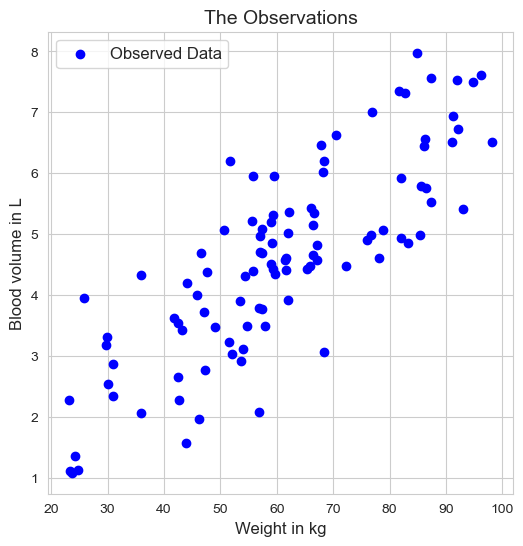

In [3]:
## Plotting data

## Make a figure
plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(X_obs, y_obs, c="b", label="Observed Data")

## Make labels
plt.xlabel("Weight in kg", fontsize=12)
plt.ylabel("Blood volume in L", fontsize=12)
plt.legend(fontsize=12)
plt.title("The Observations", fontsize=14)

plt.show()

We will now use a simple linear regression model:  

$$
f_{\theta_0,\theta_1}(x) = \theta_0 + \theta_1 x
$$

We will measure performance using *mean squared error* as our loss function.

In [4]:
## Training the algorithm
## It is okay to not understand this code yet.
## We will do a much deeper dive soon!
reg = LinearRegression()

reg.fit(X_obs.reshape(-1, 1), y_obs)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

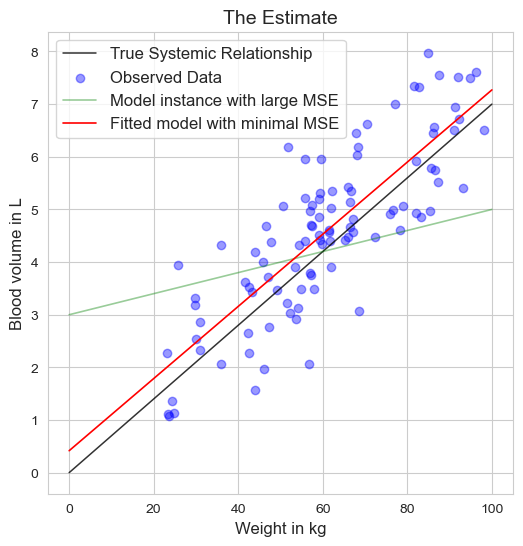

In [5]:
## Plotting data

## Make a figure
plt.figure(figsize=(6, 6))

## Plot the "truth"
plt.plot(
    X_systematic,
    y_systematic,
    "k-",
    linewidth=1.1,
    label="True Systemic Relationship",
    alpha=0.8,
)

## Plot the observations
plt.scatter(X_obs, y_obs, c="b", label="Observed Data", alpha=0.4)

## Plot a bad estimate
plt.plot(
    X_systematic,
    3 + 0.02 * X_systematic,
    linewidth=1.2,
    alpha=0.4,
    color="green",
    label="Model instance with large MSE",
)

## Plot the "estimate"
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)


## Make labels
plt.xlabel("Weight in kg", fontsize=12)
plt.ylabel("Blood volume in L", fontsize=12)
plt.legend(fontsize=12)
plt.title("The Estimate", fontsize=14)

plt.show()

We can notice that the estimate $\hat{f}$ is not precisely the same as $f$ but it is quite close.

## Two main supervised learning modeling goals

We typically adopt this supervised modeling framework with two goals in mind:

1. <b>Making predictions</b> - producing a model/algorithm using training data that can take in new observations and predict an output for them, the goal here is to make the best predictions possible, i.e. the ones that are closest to the actual values
    - Example:  Given the lat/lon coordinates and parental income of a child, predict their IQ score.
2. <b>Making inferences</b> - producing a model that helps explain the relationship, if any, between $y$ and $\vec{x}$. In this setting the goal is to understand how changes in $\vec{x}$ impact $y$. One example of the "best" estimate in this setting is finding the model the explains as much of the variance in $y$ while still being parsimonious.
    - Example: Controlling for parental income, does the average soil lead concentration have a statistically significant association with IQ? 

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.  Modified by Steven Gubkin 2024.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)